<a href="https://colab.research.google.com/github/Fundkdh/algorithm-2022/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%A7%88%EC%BC%80%ED%8C%85_%EB%B6%84%EC%84%9D_%EC%A0%84%EB%AC%B8%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#인공 신경망

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ashopping.csv", encoding = "cp949")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [3]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [4]:
#분류 예측

# 1. 변수 선택

X= df[['총매출액', '구매금액대', '1회 평균매출액', '평균 구매주기', '거래기간']]
Y= df["할인민감여부"]
#2 train -test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
#3 데이터 전처리(preprocessing)
ct =ColumnTransformer([("scaling", StandardScaler(), ['총매출액', '1회 평균매출액', '평균 구매주기', '거래기간'])
,("onehot", OneHotEncoder(sparse = False), ['구매금액대'])])

ct.fit(X_train)
ct.transform(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)
#4 오버샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [5]:
#5 모델링
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(random_state=0, alpha = 0.001, hidden_layer_sizes=[50])

nn_model.fit(X_train, Y_train)

#6 예측
Y_pred = nn_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
#7 결과값 보고
print("Y 예측값 \n", Y_pred)
print("accuracy(train :{:.3f}".format(nn_model.score(X_train, Y_train)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))


Y 예측값 
 [1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1
 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0
 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0
 0 0 0 0]
accuracy(train :0.889
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       177
           1       0.85      0.89      0.87       123

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [7]:
import numpy as  np
#변수 선택

X= df[['총매출액', '구매금액대', '1회 평균매출액', '평균 구매주기', '거래기간']]
Y= df["할인민감여부"]
#2 train -test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
#3 데이터 전처리(preprocessing)
ct =ColumnTransformer([("scaling", StandardScaler(), ['총매출액', '1회 평균매출액', '평균 구매주기', '거래기간'])
,("onehot", OneHotEncoder(sparse = False), ['구매금액대'])])

ct.fit(X_train)
ct.transform(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)



In [8]:
#4 
from sklearn.neural_network import MLPRegressor

#4-1 모델 생성
nn_reg_model = MLPRegressor(random_state =0, alpha =1, max_iter = 1000,
                           hidden_layer_sizes= [50, 50])

#5모형학습 및 예측 
nn_reg_model.fit(X_train, Y_train)
Y_pred = nn_reg_model.predict(X_test)

#6
print("Y predict value : \n", Y_pred)
print("train accuracy: {:.3f}".format(nn_reg_model.score(X_train, Y_train)))
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: {:.3f}".format(rmse))

Y predict value : 
 [ 5.66197968e-01  9.48462925e-01  4.06696858e-01  4.04310047e-01
  6.62675216e-01  1.13142450e+00  1.03459517e-01  8.41635186e-02
  1.45914597e-01  8.05569653e-01  5.30466474e-02  4.66355862e-01
  9.08320540e-01  4.79464393e-02  1.32646238e+00  2.31638518e-01
  8.73305711e-01  6.97881413e-03 -6.90441378e-03  1.63307510e-02
  6.03229027e-02  4.23902334e-01 -2.35408070e-03  1.21523435e-01
  5.59707367e-01  8.76286927e-01  2.52760703e-02  7.07014677e-02
  9.16146581e-02  1.03091105e-02  6.28736175e-01  7.69093969e-01
  5.59507113e-01  1.26394830e+00  5.15444029e-01  8.75918953e-01
  1.12684830e+00 -1.90035267e-02  1.12272285e+00  2.16486494e-01
  5.41664170e-02  1.05862580e+00  7.11950958e-01  8.59343317e-01
  2.66954512e-02  3.86259788e-02  9.07579188e-01  5.46738434e-02
  2.88083384e-02  6.61604529e-02  6.21358040e-01  9.89825019e-02
  1.04174996e-01  3.66755445e-02  6.15521790e-01  5.00887864e-01
  1.51105026e-02  4.88526456e-01  1.17239148e+00  7.36129671e-01
  1.0

# 딥러닝닝

In [9]:
#딥러닝

###경고문 제거
import warnings
warnings.filterwarnings("ignore")

In [10]:
X= df[['총매출액', '구매금액대', '1회 평균매출액', '평균 구매주기', '거래기간']]
Y= df["할인민감여부"]
#2 train -test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
#3 데이터 전처리(preprocessing)
ct =ColumnTransformer([("scaling", StandardScaler(), ['총매출액', '1회 평균매출액', '평균 구매주기', '거래기간'])
,("onehot", OneHotEncoder(sparse = False), ['구매금액대'])])

ct.fit(X_train)
ct.transform(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)
#4 오버샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [11]:
import keras 
import tensorflow as tf
import numpy as  np

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.metrics import Accuracy

#5 시드값 설정
np.random.seed(0)
tf.random.set_seed(0)

#모형 생성m
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_dim=7, activation ="relu"))
model.add(keras.layers.Dense(64, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

#7 모형학습
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 100,
                    batch_size = 64, verbose = 2)

Epoch 1/100
11/11 - 2s - loss: 0.6829 - accuracy: 0.5888 - val_loss: 0.6856 - val_accuracy: 0.6529 - 2s/epoch - 179ms/step
Epoch 2/100
11/11 - 0s - loss: 0.5836 - accuracy: 0.8254 - val_loss: 0.6330 - val_accuracy: 0.6471 - 140ms/epoch - 13ms/step
Epoch 3/100
11/11 - 0s - loss: 0.5174 - accuracy: 0.8284 - val_loss: 0.6003 - val_accuracy: 0.6765 - 283ms/epoch - 26ms/step
Epoch 4/100
11/11 - 0s - loss: 0.4679 - accuracy: 0.8328 - val_loss: 0.5588 - val_accuracy: 0.7353 - 96ms/epoch - 9ms/step
Epoch 5/100
11/11 - 0s - loss: 0.4343 - accuracy: 0.8595 - val_loss: 0.5102 - val_accuracy: 0.8118 - 90ms/epoch - 8ms/step
Epoch 6/100
11/11 - 0s - loss: 0.4104 - accuracy: 0.8624 - val_loss: 0.5205 - val_accuracy: 0.7882 - 112ms/epoch - 10ms/step
Epoch 7/100
11/11 - 0s - loss: 0.3902 - accuracy: 0.8713 - val_loss: 0.4881 - val_accuracy: 0.8235 - 95ms/epoch - 9ms/step
Epoch 8/100
11/11 - 0s - loss: 0.3756 - accuracy: 0.8802 - val_loss: 0.4970 - val_accuracy: 0.8176 - 138ms/epoch - 13ms/step
Epoch 9/

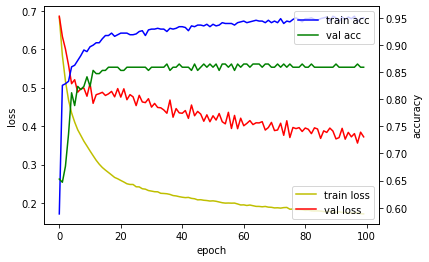

In [12]:
import matplotlib.pyplot as plt 
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

#오차(loss) 그리기
loss_ax.plot(history.history["loss"], "y", label = "train loss")
loss_ax.plot(history.history["val_loss"], "r", label = "val loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc = "lower right")

#accuracy(정확도) 그리기
acc_ax.plot(history.history["accuracy"], "b", label = "train acc")
acc_ax.plot(history.history["val_accuracy"], "g", label = "val acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc = "upper right")

plt.show()

In [13]:
model.fit(X_train, Y_train, validation_split=0.2, epochs = 20,
          batch_size = 64, verbose = 1)


Epoch 1/20
11/11 [==============================] - 0s 15ms/step - loss: 0.1702 - accuracy: 0.9497 - val_loss: 0.3680 - val_accuracy: 0.8588
Epoch 2/20
11/11 [==============================] - 0s 23ms/step - loss: 0.1697 - accuracy: 0.9512 - val_loss: 0.3609 - val_accuracy: 0.8588
Epoch 3/20
11/11 [==============================] - 0s 12ms/step - loss: 0.1706 - accuracy: 0.9497 - val_loss: 0.3671 - val_accuracy: 0.8588
Epoch 4/20
11/11 [==============================] - 0s 20ms/step - loss: 0.1696 - accuracy: 0.9497 - val_loss: 0.3579 - val_accuracy: 0.8647
Epoch 5/20
11/11 [==============================] - 0s 25ms/step - loss: 0.1683 - accuracy: 0.9512 - val_loss: 0.3734 - val_accuracy: 0.8588
Epoch 6/20
11/11 [==============================] - 0s 10ms/step - loss: 0.1685 - accuracy: 0.9512 - val_loss: 0.3627 - val_accuracy: 0.8588
Epoch 7/20
11/11 [==============================] - 0s 10ms/step - loss: 0.1688 - accuracy: 0.9527 - val_loss: 0.3614 - val_accuracy: 0.8588
Epoch 8/20
11

In [14]:
Y_pred = model.predict(X_test, verbose = 0)
Y_class = np.round(Y_pred, 0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
test_score = model.evaluate(X_test, Y_test, verbose=0)
print("Y 예측값: \n", Y_pred[:5])
print("Y 예측 클래스: \n", Y_class[:5])
print("train accuracy : {:.3f}".format(train_score[0], train_score[1]))
print("test accuracy: {:.3f}".format(test_score[0], test_score[1]))

Y 예측값: 
 [[0.93126047]
 [1.        ]
 [0.01772536]
 [0.01244921]
 [0.99973166]]
Y 예측 클래스: 
 [[1.]
 [1.]
 [0.]
 [0.]
 [1.]]
train accuracy : 0.202
test accuracy: 0.224


In [15]:
X= df[['총매출액', '구매금액대', '1회 평균매출액', '평균 구매주기', '거래기간']]
Y= df["할인민감여부"]
#2 train -test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
#3 데이터 전처리(preprocessing)
ct =ColumnTransformer([("scaling", StandardScaler(), ['총매출액', '1회 평균매출액', '평균 구매주기', '거래기간'])
,("onehot", OneHotEncoder(sparse = False), ['구매금액대'])])

ct.fit(X_train)
ct.transform(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)
#4 오버샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0, n_estimators = 300, max_depth =3)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value : \n", Y_pred)
print("accuracy(test) : {:.3f}".format(model.score(X_test, Y_test)))
print(classification_report(Y_test, Y_pred))

Y predict value : 
 [1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1
 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0
 0 0 0 0]
accuracy(test) : 0.947
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       177
           1       0.99      0.88      0.93       123

    accuracy                           0.95       300
   macro avg       0.96      0.94      0.94       300
weighted avg       0.95      0.95      0.95       300



In [17]:
##1. 변수선택
X = df[df.이탈여부 == 0][["방문빈도", "총 할인 금액","고객등급","구매유형","거래기간",
                   "할인민감여부","평균 구매주기"]]
Y = np.log1p(df[df.이탈여부 == 0]["1회 평균매출액"])

#2.train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)

ct = ColumnTransformer([("scaling", StandardScaler(),['방문빈도','총 할인 금액','평균 구매주기','거래기간']), 
                        ("onehot", OneHotEncoder(sparse = False),['고객등급','구매유형','할인민감여부'])])
ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)

In [19]:
#4 모형 생성
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0, n_estimators= 100, max_depth =4)

#5 모형 예측 평가
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value : \n", Y_pred)
print("accuracy(R2) :{:.3f}".format(model.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE :", rmse)

Y predict value : 
 [12.68641835 12.12514749 12.04819279 13.04580899 11.50906768 12.45183582
 11.28296585 12.28747852 11.86494273 12.35358139 12.3872265  12.01396895
 12.3207311  12.16711163 12.72553    12.43847827 12.70631401 12.74484282
 11.93548044 12.48363036 12.70833215 11.50205816 12.3872265  12.61313248
 11.13635832 12.85315034 12.69646319 12.2799654  12.29330952 12.07066037
 12.7318708  13.03072124 12.44587063 12.83922589 11.99165355 11.93548044
 12.07982016 12.87533113 11.92291372 13.17748045 12.77463562 12.29742037
 12.44945001 12.27423314 12.44938301 12.68738612 11.47768812 12.09294686
 12.70377324 12.45477652 11.86470087 13.58567965 11.23433862 12.13775744
 12.70918345 12.34530688 12.67303461 12.40944139 12.28433595 12.36128948
 12.7008786  12.57507179 12.11883138 12.44859275 12.29201016 11.82194505
 11.91682041 11.55244151 13.0432612  12.01568152 12.38104273 11.78476895
 11.91986181 11.77914657 12.32409993 13.20140162 12.67190941 12.99665869
 12.1142171  12.38934131 12.448

#그래디언트 부스트(grident boost)

In [20]:
X= df[['총매출액', '구매금액대', '1회 평균매출액', '평균 구매주기', '거래기간']]
Y= df["할인민감여부"]
#2 train -test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
#3 데이터 전처리(preprocessing)
ct =ColumnTransformer([("scaling", StandardScaler(), ['총매출액', '1회 평균매출액', '평균 구매주기', '거래기간'])
,("onehot", OneHotEncoder(sparse = False), ['구매금액대'])])

ct.fit(X_train)
ct.transform(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)
#4 오버샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [21]:
#5 모형 생성
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state =0 , n_estimators = 100, max_depth = 4,
                                   learning_rate = 0.1)

#6 모형학습 예측
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value: \n", Y_pred)
print("accuracy(test): {:.3f}".format(model.score(X_test, Y_test)))
print(classification_report(Y_test, Y_pred))

Y predict value: 
 [1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1
 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1
 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0
 0 0 0 0]
accuracy(test): 0.933
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       177
           1       0.95      0.89      0.92       123

    accuracy                           0.93       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [22]:
##1. 변수선택
X = df[df.이탈여부 == 0][["방문빈도", "총 할인 금액","고객등급","구매유형","거래기간",
                   "할인민감여부","평균 구매주기"]]
Y = np.log1p(df[df.이탈여부 == 0]["1회 평균매출액"])

#2.train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)

ct = ColumnTransformer([("scaling", StandardScaler(),['방문빈도','총 할인 금액','평균 구매주기','거래기간']), 
                        ("onehot", OneHotEncoder(sparse = False),['고객등급','구매유형','할인민감여부'])])
ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)

In [23]:
#4 모형 생성
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state =0 , n_estimators = 100, max_depth = 4,
                                   learning_rate = 0.1)

#5 모형 학습 예측

#5 모형 예측 평가
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value : \n", Y_pred)
print("accuracy(R2) :{:.3f}".format(model.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE :", rmse)

Y predict value : 
 [12.64617366 12.25583406 12.09458751 13.07090617 11.40422303 12.45220348
 11.61198904 12.45651119 12.08328814 12.32640447 12.39533751 12.25092541
 12.13577357 12.24057416 12.73503493 12.30862805 12.84361351 12.99742565
 11.76512764 12.45752565 12.63483127 11.38579233 12.41560355 12.50712961
 10.79435548 12.62928969 12.60613938 11.92964399 12.34916462 12.07520652
 12.57121312 13.04335327 12.39965923 13.03165827 12.11711146 12.09888134
 12.18727902 12.94489209 11.93717047 13.15827429 12.76957258 12.21597158
 12.54049819 12.10678757 12.64544285 12.59000213 11.18198188 12.13358256
 12.5668075  12.42634623 11.81913361 13.51669361 11.10458182 12.24715891
 13.07232151 12.20069308 12.66489797 12.28476526 11.98447614 12.31654311
 12.79736561 12.76535462 11.92863698 12.44145179 12.12157567 12.10310068
 11.87519738 11.62364672 12.99672955 12.27936785 12.36258046 11.72329704
 11.91861812 11.96233767 12.16868105 13.12437922 12.65319979 12.93053239
 12.03260309 12.28389237 12.000